# Uncertainty: Standard Error and 95% Confidence Intervals

<div class="alert alert-info">Learning Goals:</div>

1. Understand the concepts of standard error and 95% confidence intervals.
2. Recognize the importance of standard error and confidence intervals in biostatistics.
3. Learn how to calculate standard error and 95% confidence intervals using Python.

## Introduction
In biostatistics, researchers often deal with uncertainty when estimating population parameters based on sample data. Standard error and confidence intervals are statistical measures that help quantify this uncertainty and provide a range within which the true population parameter is likely to fall. This chapter will introduce the concepts of standard error and 95% confidence intervals, explain their significance in biostatistics, and provide Python code examples for their calculation.

### Uncertainty in estimates

**Estimate**: an inference about a population parameter based on a subsample of that
population. Since samples are only a subset of the entire population, there is a 
chance that estimates from repeated sampling from that population can be off by
a particular amount. This uncertainty can be visualized by producing a histogram of the **sampling distribution**. 

### Example: Body weight of penguins in Antarctica

There is natural variation in penguin size and weight in nature, which is influenced by factors such as species, age, sex, and environmental conditions. If we are interested in estimating the average penguin weight, we would need to take a subsample from the entire penguin population. However, the size of our sample can affect the accuracy estimate. A smaller sample size may not adequately represent the entire population, leading to a less reliable average estimate (i.e., increased error). Conversely, a larger sample size provides a more comprehensive representation of the population and reduces the potential for sampling bias (i.e., reduced error). By increasing the sample size, the estimate of the average penguin weight becomes more reliable, as it accounts for the natural variability observed in penguin populations and minimizes the impact of individual **outliers**, which area a small number of extremely small or extremely large individuals compared to the average.

<div style="display:flex; justify-content:center;">
    <img src="images/penguins.jpg" alt="Image" width="500" height="300" style="margin-left: 10px;">
</div>

We can illustrate the effect of sample size on the accuracy of our estimate by plotting the sampling distributions of either subsamples of 10 or subsamples of 50. **Note**: These cells are separate but need to be run in order or they will not work.

In [39]:
import numpy as np
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins

# Load the Palmer Penguin dataset
df = load_penguins()

In [27]:
# Random subsample of body mass from 10 penguins
s_10 = np.random.choice(df.body_mass_g, size=10, replace=False)
print(s_10)

[4400. 3075. 4500. 3325. 4250. 5150. 4400. 2900. 4775. 4100.]


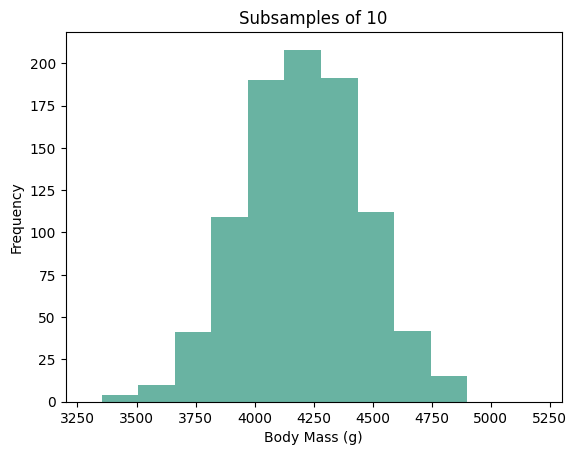

In [37]:
# Sampling distribution of 1000 subsamples of 10
dis_10 = []
for _ in range(1000):
    x = np.random.choice(df.body_mass_g, size=10, replace=False)
    dis_10.append(np.mean(x))

# Plotting the sampling distribution of subsamples of 10
plt.hist(dis_10, color="#69b3a2")
plt.xlim([3200, 5300])
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Subsamples of 10")
plt.show()

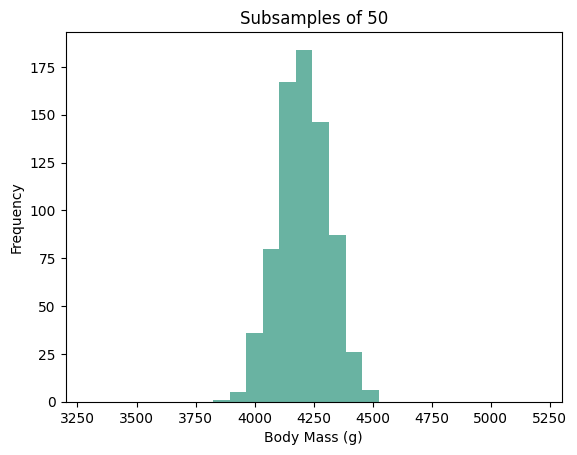

In [38]:
# Sampling distribution of subsamples of 50
dis_50 = []
for _ in range(1000):
    x = np.random.choice(df.body_mass_g, size=50, replace=False)
    dis_50.append(np.mean(x))

# Plotting the sampling distribution of 1000 subsamples of 50
plt.hist(dis_50, color="#69b3a2")
plt.xlim([3200, 5300])
plt.xlabel("Body Mass (g)")
plt.ylabel("Frequency")
plt.title("Subsamples of 50")
plt.show()

Notice that the histogram of the sampling distribution of the random subsample of 50 is skinnier the one for the subsample of 10. This illustrates that the sampling error is lower with a subsample of 50. This makes sense because the greater the sample (n), the lower the error due to random chance.

### Standard Error

The standard error (SE) measures the average amount of variability or dispersion of sample estimates around the true population parameter. It represents the precision of an estimate. A smaller standard error indicates a more precise estimate.


### Calculation of Standard Error
To calculate the standard error, use the following formula:

$SE_{\bar{y}} = \frac{s}{\sqrt{n}}$

In [3]:
import numpy as np
from palmerpenguins import load_penguins

# Load the Palmer Penguin dataset
df = load_penguins()

def calculate_standard_error(data):
    sample_size = len(data)
    standard_deviation = np.std(data)
    standard_error = standard_deviation / np.sqrt(sample_size)
    return standard_error

sterr = calculate_standard_error(df['bill_length_mm'])
print(sterr)

ModuleNotFoundError: No module named 'palmerpenguins'

In this code example, `data` represents the sample data, and `calculate_standard_error` function returns the standard error.

### Confidence Intervals
A confidence interval (CI) is a range of values within which the true population parameter is likely to lie with a certain level of confidence. The most commonly used confidence level is 95%, which implies that if we repeated the sampling and estimation process many times, approximately 95% of the resulting confidence intervals would contain the true population parameter.

### Calculation of Confidence Intervals
To calculate the 95% confidence interval, use the following formula:

In [3]:
from palmerpenguins import load_penguins

def calculate_confidence_interval(data):
    sample_mean = np.mean(data)
    sample_size = len(data)
    standard_error = calculate_standard_error(data)
    margin_of_error = 2 * standard_error # The simplest calculation, using 2 * SE
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return (lower_bound, upper_bound)

# Load the Palmer Penguin dataset
df = load_penguins()

ci_calc = calculate_confidence_interval(df['bill_length_mm'])
print(ci_calc)

In this code example, `data` represents the sample data, and `calculate_confidence_interval` function returns a tuple containing the lower bound and upper bound of the confidence interval as 2 * SE.

<div class="alert alert-success"><b>Note</b>: there are multiple ways to calculate 95% CI depending on your data and statistical methods.</div>

### Standard Error and Confidence Intervals in Biostatistics

Standard error provides a measure of the precision of an estimate, allowing researchers to understand the reliability of their findings. It helps determine whether observed differences between groups or associations between variables are statistically significant. Standard error of the mean can be represented in text using the $\pm$ symbol. 

Example, the average weight of a sample of 10 penguins is 4087 $\pm$ 223.8 g

Standard error of the mean are also important components to bar graphs which illustrate the means of multiple groups. The green bars represent the mean body weight of the three penguin species in the Palmer Penguin dataset, the black bars represent $\pm$ SE.

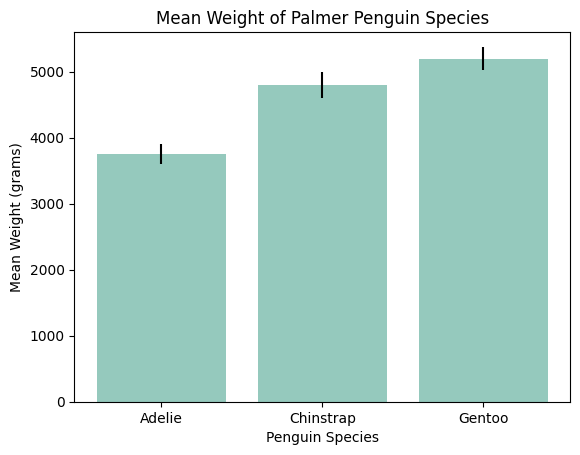

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data of mean weights and corresponding standard errors for each penguin species
species = ['Adelie', 'Chinstrap', 'Gentoo']
mean_weights = [3750, 4800, 5200]  # Mean weights in grams
std_errors = [150, 200, 180]  # Standard errors of the mean weights

# Calculate the positions of the bars on the x-axis
x = np.arange(len(species))

# Plotting the bar graph
plt.bar(x, mean_weights, yerr=std_errors, color="#69b3a2", alpha=0.7)

# Customize the plot
plt.xlabel('Penguin Species')
plt.ylabel('Mean Weight (grams)')
plt.title('Mean Weight of Palmer Penguin Species')
plt.xticks(x, species)
plt.ylim([0, max(mean_weights) + max(std_errors) + 200])

# Display the plot
plt.show()


Confidence intervals provide a range of plausible values for the population parameter, which helps researchers communicate the uncertainty in their estimates. It allows readers to evaluate the practical significance of the findings and compare them to other studies. Like SE, 95% CI can be represented in bar plots and other graphical outputs. 

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data of mean weights and corresponding 95% confidence intervals for each penguin species
species = ['Adelie', 'Chinstrap', 'Gentoo']
mean_weights = [3750, 4800, 5200]  # Mean weights in grams
confidence_intervals = [300, 400, 360]  # 95% confidence intervals (2 * SE)

# Calculate the positions of the bars on the x-axis
x = np.arange(len(species))

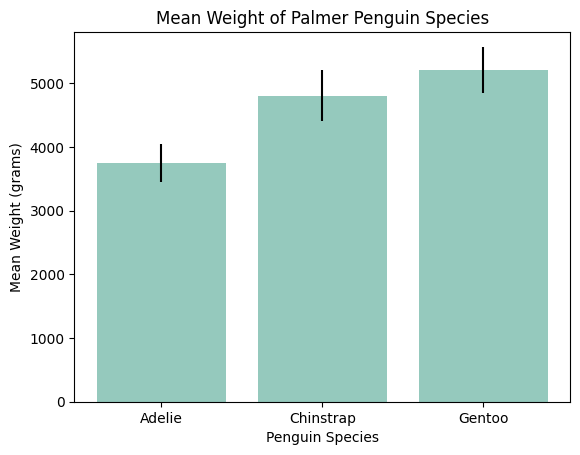

In [56]:
# Plotting the bar graph
plt.bar(x, mean_weights, yerr=confidence_intervals, color="#69b3a2", alpha=0.7)

# Customize the plot
plt.xlabel('Penguin Species')
plt.ylabel('Mean Weight (grams)')
plt.title('Mean Weight of Palmer Penguin Species')
plt.xticks(x, species)
plt.ylim([0, max(mean_weights) + max(confidence_intervals) + 200])

# Display the plot
plt.show()

The difference between SE and 95% CI bars is that you can use the overlapping of the 95% CI to make statistical inferences. For example, since all of the 95% CI for the three penguin species do not overlap, then they are likely significantly different from each other.

<div class="alert alert-warning"><b>You cannot make this same claim with SE.</b></div>

<div style="display:flex; justify-content:center;">
    <img src="images/penguins2.jpg" alt="Image" width="400" height="300" style="margin-left: 10px;">
</div>


## Practice problems

Using the data provided in the Palmer Penguin dataset

1. Calculate the standard error and 95% CI of the bill lengths of a random sample of 5 penguins

2. Calculate the standard error and 95% CI of the bill lengths of a random sample of 100 penguins

3. Are the SE and 95% CI different between #1 and #2? What is the explanation for the difference between the two?